In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

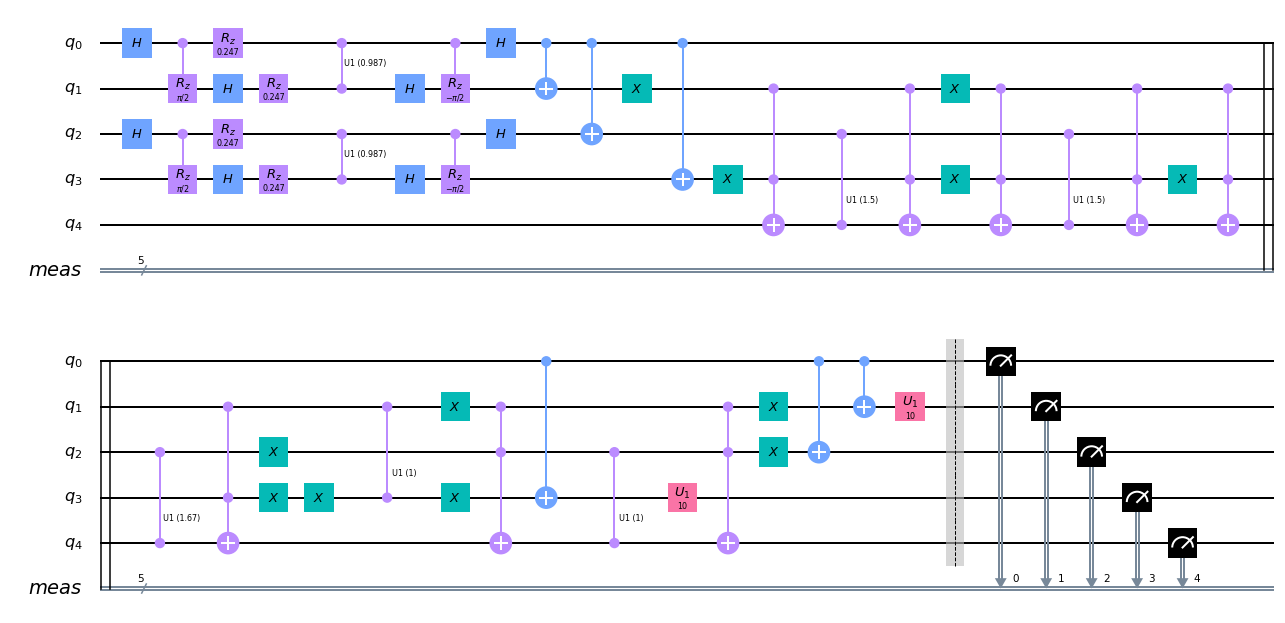

{'01111': 5, '00101': 6, '00011': 46, '01010': 9, '01110': 13, '00110': 13, '00000': 519, '01011': 9, '01100': 49, '01000': 80, '01101': 8, '00111': 6, '00100': 102, '00010': 63, '00001': 81, '01001': 15}


In [19]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
import numpy as np

l=1
v=1
t=10

qc = QuantumCircuit()

q = QuantumRegister(5, 'q')

qc.add_register(q)

qc.h(q[0])
qc.h(q[2])
qc.crz(np.pi / 2, q[0], q[1])
qc.crz(np.pi / 2, q[2], q[3])
qc.rz(np.pi**2 / 40, q[0])
qc.h(q[1])
qc.rz(np.pi**2 / 40, q[2])
qc.h(q[3])
qc.rz(np.pi**2 / 40, q[1])
qc.rz(np.pi**2 / 40, q[3])
qc.cu1(np.pi**2 / 10, q[0], q[1])
qc.cu1(np.pi**2 / 10, q[2], q[3])
qc.h(q[1])
qc.h(q[3])
qc.crz(-1 * np.pi / 2, q[0], q[1])
qc.crz(-1 * np.pi / 2, q[2], q[3])
qc.h(q[0])
qc.h(q[2])
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])
qc.cx(q[0], q[3])
qc.x(q[1])
qc.x(q[3])
qc.ccx(q[3], q[1], q[4])
qc.cu1(3/(2*l),q[4], q[2])
qc.ccx(q[3], q[1], q[4])
qc.x(q[1])
qc.x(q[3])
qc.ccx(q[3], q[1], q[4])
qc.cu1(3/(2*l),q[4],q[2])
qc.ccx(q[3], q[1], q[4])
qc.x(q[3])
qc.ccx(q[3], q[1], q[4])
qc.cu1(5/(3*l),q[4], q[2])
qc.ccx(q[3], q[1], q[4])
qc.x(q[3])
qc.x(q[3])
qc.cu1(1/l, q[3], q[1])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.ccx(q[2], q[1], q[4])
qc.cu1(1/l,q[4],q[2])
qc.ccx(q[2], q[1], q[4])
qc.x(q[1])
qc.x(q[2])
qc.cx(q[0], q[3])
qc.cx(q[0], q[2])
qc.u1(v*t, q[3])
qc.cx(q[0], q[1])
qc.u1(v*t, q[1])
qc.measure_all()

display(qc.draw())

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend,shots=1024)
job_result = job.result()
print(job_result.get_counts(qc))